In [868]:
# Importación de librerias a usar.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importación spaCy
import spacy
import en_core_web_sm

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [869]:
# Abrimos el csv.
data = pd.read_csv('youtoxic_english_1000.csv')
data.head(7)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False


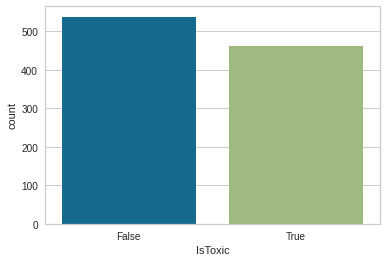

In [870]:
#Comprobamos si los datos están balanceados si es Istoxic o no.
sns.countplot(x ='IsToxic', data = data)

Podemos observar que los datos más o menos están balanceados, tomamos la decisión de no tratar los datos.


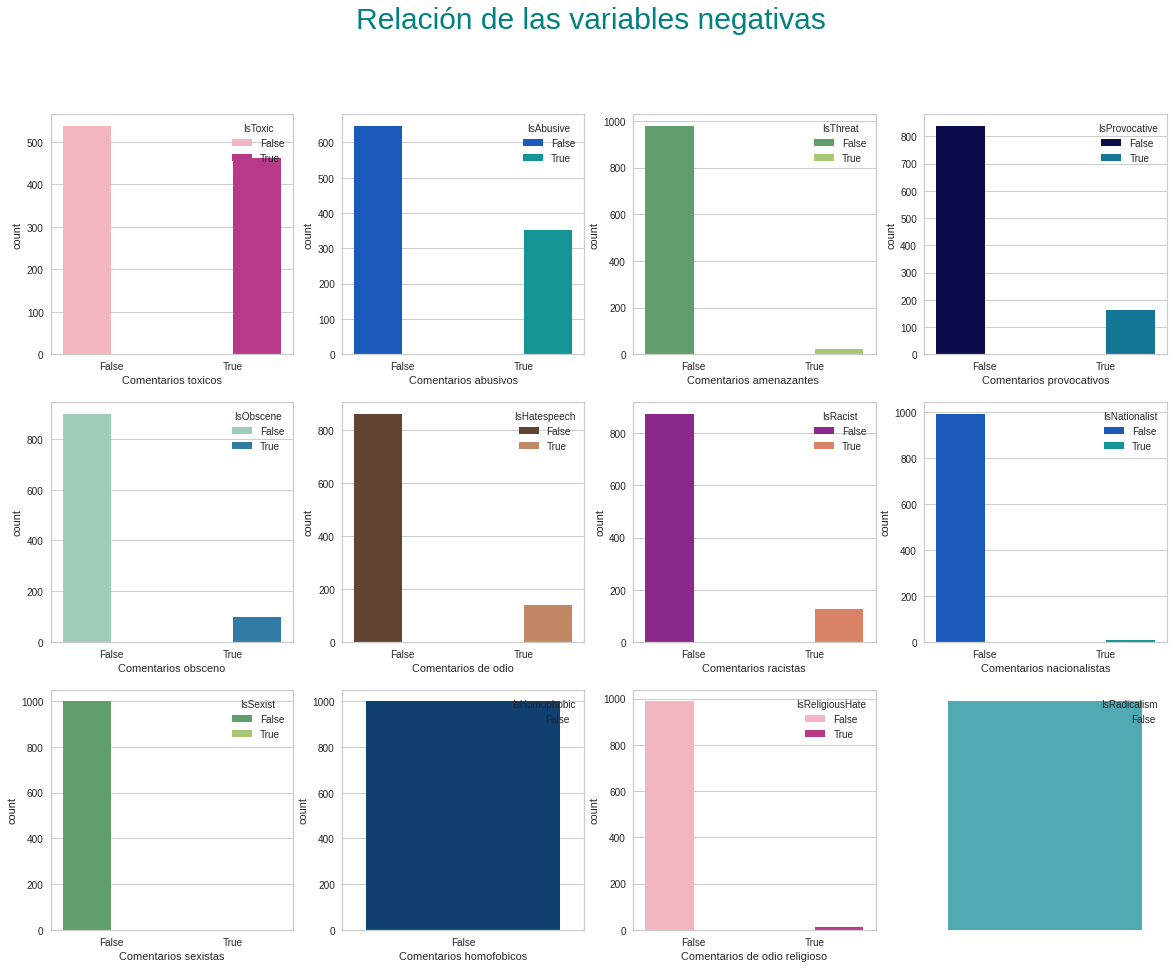

In [871]:
#Se crea un gráfico para visualizar de manera simultánea todas las variables.
fig, ax = plt.subplots(3, 4, figsize = (20, 15))
ax[2, 3].axis('off')

plt.suptitle('Relación de las variables negativas', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='IsToxic', data= data, hue= 'IsToxic', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Comentarios toxicos')

ax2 = sns.countplot(x ='IsAbusive', data= data, hue= 'IsAbusive', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Comentarios abusivos')

ax3 = sns.countplot(x ='IsThreat', data= data, hue= 'IsThreat', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Comentarios amenazantes ')

ax4 = sns.countplot(x ='IsProvocative', data= data, hue= 'IsProvocative', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Comentarios provocativos')

ax5 = sns.countplot(x ='IsObscene', data= data, hue= 'IsObscene', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Comentarios obsceno')

ax6 = sns.countplot(x ='IsHatespeech', data= data, hue= 'IsHatespeech', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Comentarios de odio')

ax7 = sns.countplot(x ='IsRacist', data= data, hue= 'IsRacist', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Comentarios racistas')

ax8 = sns.countplot(x ='IsNationalist', data= data, hue= 'IsNationalist', ax= ax[1, 3], palette= 'winter')
ax8.set(xlabel = 'Comentarios nacionalistas')

ax9 = sns.countplot(x ='IsSexist', data= data, hue= 'IsSexist', ax= ax[2, 0], palette= 'summer')
ax9.set(xlabel = 'Comentarios sexistas')

ax10 = sns.countplot(x ='IsHomophobic', data= data, hue= 'IsHomophobic', ax= ax[2, 1], palette= 'ocean')
ax10.set(xlabel = 'Comentarios homofobicos')

ax11 = sns.countplot(x ='IsReligiousHate', data= data, hue= 'IsReligiousHate', ax= ax[2, 2], palette= 'RdPu')
ax11.set(xlabel = 'Comentarios de odio religioso')

ax12 = sns.countplot(x ='IsRadicalism', data= data, hue= 'IsRadicalism', ax= ax[2, 3], palette= 'YlGnBu')
ax12.set(xlabel = 'Comentarios radicalistas')

plt.show()

Con este gráfico observamos todas las variables del dataset, vemos que las que más balanceadas están son la variable IsToxic y la variable IsAbusive.
Tomamos la decisión que vamos a trabajar con IsToxic como la variable que nos prediga.

In [872]:
#Decripción del dataset
data.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [873]:
#Información del dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [874]:
#Comprobamos si existen valores nulos
data.isnull().sum(axis = 0)

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [875]:
#Comprobamos los datos duplicados
data_duplicadas = data[data.duplicated()]
len(data_duplicadas)

0

El dataset está con todos los valores, no hace falta tratar los nulos ni limpiar los datos duplicados.

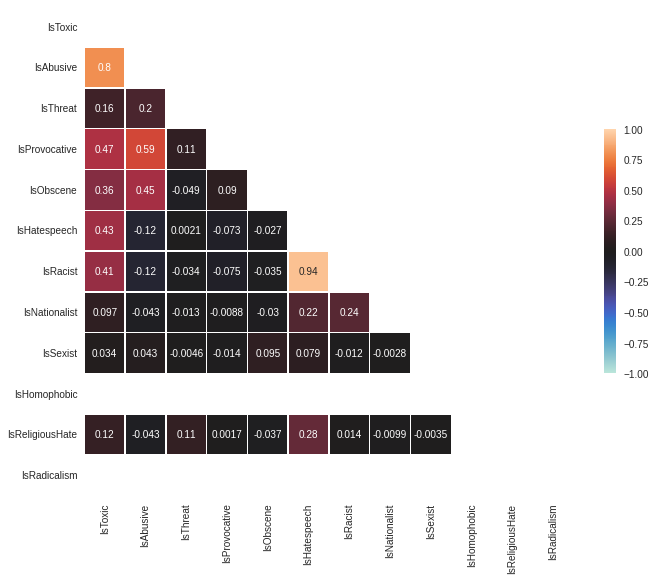

In [876]:
#Mapa de calor con las variables con la correlación.
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
cmap = sns.diverging_palette(20, 220, n=200)
sns.heatmap(data.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [877]:
# Comprobamos la variable IsHomophobic si tiene valores en True.
data.IsHomophobic.value_counts()

False    1000
Name: IsHomophobic, dtype: int64

In [878]:
# Comprobamos la variable IsRadicalism si tiene valores en True.
data.IsRadicalism.value_counts()

False    1000
Name: IsRadicalism, dtype: int64

Comprobación de variables que no tienen ningún valor en True. En todo el dataset no se encuentra ningún dato clasificado que tenga estas características.

In [879]:
# Sacamos la cantidad de videos y su número de comentarios en el dataset.
data.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

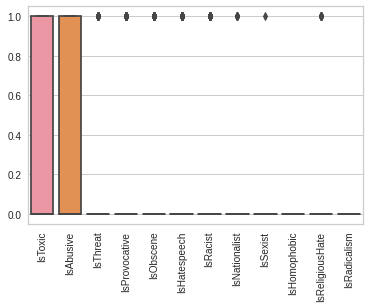

In [880]:
# La relación de las variables.
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## 3. Limpieza de datos

In [881]:
# Limpieza y unificación de palabras.
import re 
import string 
def clean_text_round1(text): 
    '''Nos convierte las palabras a minúsculas, signos de puntuación, números, espacios en blanco y corchetes''' 
    text = text.lower() 
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text 

round1 = lambda x: clean_text_round1(x) 

In [882]:
#Reemplazo de \Xa0 (representa un espacio duro o un espacio sin interrupciones en un programa).
data['Text'] = data['Text'].replace(u'\xa0', u' ')

In [883]:
# Aplicamos la limpieza hecha hasta ahora a la variable Text.
text_clean = data["Text"].apply(round1)
text_clean

0      if only people would just take a step back and...
1      law enforcement is not trained to shoot to app...
2      dont you reckon them black lives matter banner...
3      there are a very large number of people who do...
4      the arab dude is absolutely right he should ha...
                             ...                        
995    i remember that they sent in the national defe...
996    stats dont represent the problem race baiting ...
997    the quote from the mother wow that hit hard ve...
998                              this video is so racist
999          god the narrator has such an annoying lisp 
Name: Text, Length: 1000, dtype: object

In [884]:
# Limpiamos emojis
import re
def remove_emojis(data_clean):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data_clean)

    round1 = lambda x: remove_emojis(x)

In [885]:
# Aplicamos la limpieza de los emjis en el texto limpio.
final_text = text_clean.apply(round1)
final_text

0      if only people would just take a step back and...
1      law enforcement is not trained to shoot to app...
2      dont you reckon them black lives matter banner...
3      there are a very large number of people who do...
4      the arab dude is absolutely right he should ha...
                             ...                        
995    i remember that they sent in the national defe...
996    stats dont represent the problem race baiting ...
997    the quote from the mother wow that hit hard ve...
998                              this video is so racist
999          god the narrator has such an annoying lisp 
Name: Text, Length: 1000, dtype: object

Ya tenemos todo el texto unificado y limpio en minúsculas, sin signos de puntuación y sin emojis, listo para proceder a la tokenización.


# Tokenización

In [886]:
# Cambiamos la variable de IsToxic a numérica para que nos devuelva 0 si no es tóxico o 1 si es tóxico.
istoxic = data["IsToxic"].astype("uint8")
result = pd.concat([final_text, istoxic], axis=1)
result


,Text,IsToxic
0,if only people would just take a step back and...,0
1,law enforcement is not trained to shoot to app...,1
2,dont you reckon them black lives matter banner...,1
3,there are a very large number of people who do...,0
4,the arab dude is absolutely right he should ha...,0
...,...,...
995,i remember that they sent in the national defe...,0
996,stats dont represent the problem race baiting ...,1
997,the quote from the mother wow that hit hard ve...,0
998,this video is so racist,0


- Tokenizamos con Spacy

In [887]:
nlp = spacy.load("en_core_web_sm")
result["Tokenizacion"]= final_text.apply(lambda x: nlp.tokenizer(x))
result

,Text,IsToxic,Tokenizacion
0,if only people would just take a step back and...,0,"(if, only, people, would, just, take, a, step,..."
1,law enforcement is not trained to shoot to app...,1,"(law, enforcement, is, not, trained, to, shoot..."
2,dont you reckon them black lives matter banner...,1,"(do, nt, you, reckon, them, black, lives, matt..."
3,there are a very large number of people who do...,0,"(there, are, a, very, large, number, of, peopl..."
4,the arab dude is absolutely right he should ha...,0,"(the, arab, dude, is, absolutely, right, he, s..."
...,...,...,...
995,i remember that they sent in the national defe...,0,"(i, remember, that, they, sent, in, the, natio..."
996,stats dont represent the problem race baiting ...,1,"(stats, do, nt, represent, the, problem, race,..."
997,the quote from the mother wow that hit hard ve...,0,"(the, quote, from, the, mother, wow, that, hit..."
998,this video is so racist,0,"(this, video, is, so, racist)"


In [888]:
# Resultado del dataset una vez tokenizado con la variable IsToxic.
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          1000 non-null   object
 1   IsToxic       1000 non-null   uint8 
 2   Tokenizacion  1000 non-null   object
dtypes: object(2), uint8(1)
memory usage: 16.7+ KB


Ya tenemos un dataframe con variable tokenizada, podemos proceder a la separación con split.

# Split

In [889]:
#Separación en train y test con sklearn.
from sklearn.model_selection import train_test_split
X = result["Text"]
y = result["IsToxic"]

train_text,test_text, train_labels, test_labels = train_test_split( X, y, test_size=0.2, stratify = y)
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 800, testing examples 200


Al separar en train y test, decidimos trabajar con un 80% de los datos para train y un 20% de los datos para test.

# Entrenamiento

In [890]:
# Vectorización con Sklearn.
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [891]:
# Vectorizamos los datos de train.
x_train_counts = count_vect.fit_transform(train_text)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [892]:
# Vemos el resultado de los datos de train una vez vectorizados.
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(800, 3985)
(800, 3985)


In [893]:
# Vectorizamos los datos de test.
x_test_counts = count_vect.transform(test_text)
x_test_tfidf = transformer.transform(x_test_counts)

In [894]:
# Vemos el resultado de los datos de test una vez vectorizados.
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(200, 3985)
(200, 3985)


# Modelos predictivos

In [895]:
# Importación de libererías para trabajar con Random Forest.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [896]:
# Predicciones de test y train Random Forest.
predictions = model.predict(x_test_tfidf)
predictions2 = model.predict(x_train_tfidf)


Matriz de Confusión:



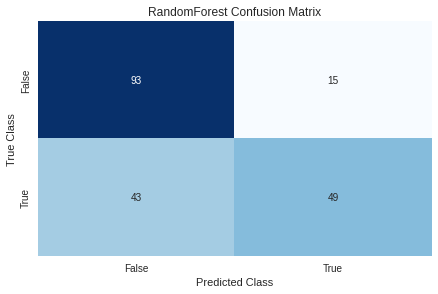


Recall: 0.532608695652174
Precision: 0.765625
F1_score: 0.6282051282051283
Accuracy: 0.71

*************************************************

recall_score_train: 1.0
precision_score_train: 1.0
f1_score_train: 1.0
accuracy_score_train: 1.0

Overfitting -40.85 % 

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       136
           1       0.53      0.77      0.63        64

    accuracy                           0.71       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.76      0.71      0.72       200



In [897]:
#Matriz de confusión para Random Forest.
    
print()
print(f"Matriz de Confusión:")
print()
    
con_matrix = confusion_matrix(test_labels, predictions)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("RandomForest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


#Métricas de test de Random Forest.

accur = accuracy_score(test_labels, predictions)
preci = precision_score(test_labels, predictions)
recal = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
class_repor = classification_report(test_labels, predictions)


#Métricas de train de Random Forest.

accur_train = accuracy_score(train_labels, predictions2)
preci_train = precision_score(train_labels, predictions2)
recal_train = recall_score(train_labels, predictions2)
f1_train = f1_score(train_labels, predictions2)


print()
print(f"Recall: {recal}")
print(f"Precision: {preci}")
print(f"F1_score: {f1}")
print(f"Accuracy: {accur}")
print()
print("*************************************************")
print()
print(f"recall_score_train: {recal_train}")
print(f"precision_score_train: {preci_train}")
print(f"f1_score_train: {f1_train}")
print(f"accuracy_score_train: {accur_train}")
print()
print("Overfitting {:.2f} % ".format(((accur - accur_train)/accur) *100))
print()
print(f"Reporte de Clasificación:")
print()
print(classification_report(predictions,test_labels))

**- Conclusiones algoritmo Random Forest:**
- Matriz de confusión:
Tenemos pocos Verdaderos Positivos en proporción a los falsos negativos.
- Métricas:
No salen malos resultados pero con la cantidad de overfitting que nos sale, decidimos probar con otros algoritmos para comparar resultados.

In [898]:
#Algoritmo Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train_tfidf, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [899]:
# Predicciones de test y train Naive Bayes.
predict_nb = NB.predict(x_test_tfidf)
predict2_nb = NB.predict(x_train_tfidf)


Matriz de Confusión:



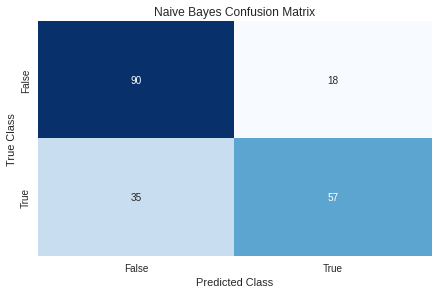


Recall: 0.6195652173913043
Precision: 0.76
F1_score: 0.6826347305389221
Accuracy: 0.735

*************************************************

recall_score_train: 0.9486486486486486
precision_score_train: 0.9943342776203966
f1_score_train: 0.970954356846473
accuracy_score_train: 0.97375

accuracy_score_train: 0.97375

Overfitting -32.48 % 

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       125
           1       0.62      0.76      0.68        75

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.75      0.73      0.74       200



In [900]:
#Matriz de confusión Naive Bayes.
    
print()
print(f"Matriz de Confusión:")
print()
    
con_matrix = confusion_matrix(test_labels, predict_nb)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

#Métricas de test Naive Bayes

accur = accuracy_score(test_labels, predict_nb)
preci = precision_score(test_labels, predict_nb)
recal = recall_score(test_labels, predict_nb)
f1 = f1_score(test_labels, predict_nb)
class_repor = classification_report(test_labels, predict_nb)


#Métricas de train Naive Bayes

accur_train = accuracy_score(train_labels, predict2_nb)
preci_train = precision_score(train_labels, predict2_nb)
recal_train = recall_score(train_labels, predict2_nb)
f1_train = f1_score(train_labels, predict2_nb)


print()
print(f"Recall: {recal}")
print(f"Precision: {preci}")
print(f"F1_score: {f1}")
print(f"Accuracy: {accur}")
print()
print("*************************************************")
print()
print(f"recall_score_train: {recal_train}")
print(f"precision_score_train: {preci_train}")
print(f"f1_score_train: {f1_train}")
print(f"accuracy_score_train: {accur_train}")
print()
print(f"accuracy_score_train: {accur_train}")
print()
print("Overfitting {:.2f} % ".format(((accur - accur_train)/accur) *100))
print()
print(f"Reporte de Clasificación:")
print()
print(classification_report(predict_nb,test_labels))

**- Conclusiones algoritmo Naive Bayes:**
- Matriz de confusión:
Mejora la proporción de los verdaderos positivos y los falsos negativos, respecto al Random Forest.
- Métricas:
Las métricas están bastante bien pero el overfitting es terrible aún.

In [901]:
# Algoritmo Lightgbm
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(learning_rate=0.01, max_depth = 4, scale_pos_weight = 5, class_weight= "balanced", min_child_weight =15)
LGBM.fit(x_train_tfidf, train_labels)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.01, max_depth=4, min_child_samples=20,
               min_child_weight=15, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [902]:
# Predicciones de test y train Lightgbm.
predict_lgbm = LGBM.predict(x_test_tfidf)
predict2_lgbm = LGBM.predict(x_train_tfidf)


Matriz de Confusión:



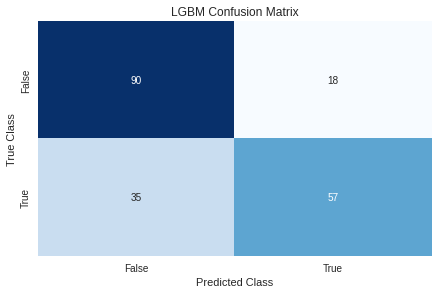


Recall: 1.0
Precision: 0.4623115577889447
F1_score: 0.6323024054982818
Accuracy: 0.465

*************************************************

recall_score_train: 1.0
precision_score_train: 0.46540880503144655
f1_score_train: 0.6351931330472104
accuracy_score_train: 0.46875

Overfitting -0.81 % 
-----------------------------------------------------

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.01      1.00      0.02         1
           1       1.00      0.46      0.63       199

    accuracy                           0.47       200
   macro avg       0.50      0.73      0.33       200
weighted avg       1.00      0.47      0.63       200



In [903]:
#Matriz de confusión Lightgbm
    
print()
print(f"Matriz de Confusión:")
print()
    
con_matrix = confusion_matrix(test_labels, predict_nb)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("LGBM Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

#Métricas de test Lightgbm.

accur = accuracy_score(test_labels, predict_lgbm)
preci = precision_score(test_labels, predict_lgbm)
recal = recall_score(test_labels, predict_lgbm)
f1 = f1_score(test_labels, predict_lgbm)
class_repor = classification_report(test_labels, predict_lgbm)


#Métricas de train Lightgbm

accur_train = accuracy_score(train_labels, predict2_lgbm)
preci_train = precision_score(train_labels, predict2_lgbm)
recal_train = recall_score(train_labels, predict2_lgbm)
f1_train = f1_score(train_labels, predict2_lgbm)


print()
print(f"Recall: {recal}")
print(f"Precision: {preci}")
print(f"F1_score: {f1}")
print(f"Accuracy: {accur}")
print()
print("*************************************************")
print()
print(f"recall_score_train: {recal_train}")
print(f"precision_score_train: {preci_train}")
print(f"f1_score_train: {f1_train}")
print(f"accuracy_score_train: {accur_train}")
print()
print("Overfitting {:.2f} % ".format(((accur - accur_train)/accur) *100))
print("-----------------------------------------------------")
print()
print(f"Reporte de Clasificación:")
print()
print(classification_report(predict_lgbm,test_labels))

**- Conclusiones algoritmo Lightgbm:**
- Matriz de confusión:
Mejora la proporción de los verdaderos positivos y los falsos negativos, respecto al Random Forest pero es muy parecida a la que sale en Naive Bayes.
- Métricas:
Las métricas son peores pero el overfitting es muy bajo, lo cual también nos hace desconfiar.

## Modelo de XGBoost Classifier

In [904]:
# Algoritmo XGBoost.
from xgboost import XGBClassifier
model_bow = XGBClassifier(learning_rate=0.01, max_depth = 5, scale_pos_weight = 10, class_weight= "balanced")
model_bow.fit(x_train_tfidf,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [905]:
# Predicciones de train y test de XGBoost.
predict_xgb = model_bow.predict(x_test_tfidf)
predict2_xgb = model_bow.predict(x_train_tfidf)


Matriz de Confusión:



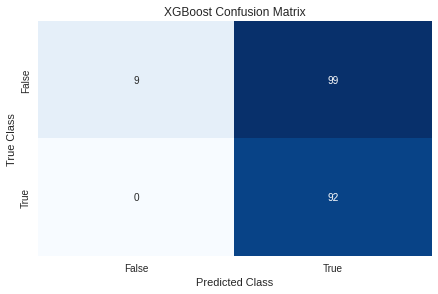


Recall: 1.0
Precision: 0.4816753926701571
F1_score: 0.6501766784452296
Accuracy: 0.505

*************************************************

recall_score_train: 1.0
precision_score_train: 0.4868421052631579
f1_score_train: 0.6548672566371682
accuracy_score_train: 0.5125


Overfitting -1.49 % 

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.08      1.00      0.15         9
           1       1.00      0.48      0.65       191

    accuracy                           0.51       200
   macro avg       0.54      0.74      0.40       200
weighted avg       0.96      0.51      0.63       200



In [906]:
#Matriz de confusión XGBoost.
    
print()
print(f"Matriz de Confusión:")
print()
    
con_matrix = confusion_matrix(test_labels, predict_xgb)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


#Métricas de test XGBoost.

accur = accuracy_score(test_labels, predict_xgb)
preci = precision_score(test_labels, predict_xgb)
recal = recall_score(test_labels, predict_xgb)
f1 = f1_score(test_labels, predict_xgb)
class_repor = classification_report(test_labels, predict_xgb)


#Métricas de train XGBoost.

accur_train = accuracy_score(train_labels, predict2_xgb)
preci_train = precision_score(train_labels, predict2_xgb)
recal_train = recall_score(train_labels, predict2_xgb)
f1_train = f1_score(train_labels, predict2_xgb)


print()
print(f"Recall: {recal}")
print(f"Precision: {preci}")
print(f"F1_score: {f1}")
print(f"Accuracy: {accur}")
print()
print("*************************************************")
print()
print(f"recall_score_train: {recal_train}")
print(f"precision_score_train: {preci_train}")
print(f"f1_score_train: {f1_train}")
print(f"accuracy_score_train: {accur_train}")
print()
print()
print("Overfitting {:.2f} % ".format(((accur - accur_train)/accur) *100))
print()
print(f"Reporte de Clasificación:")
print()
print(classification_report(predict_xgb,test_labels))

**- Conclusiones algoritmo XGBoost:**
- Matriz de confusión:
En esta matriz encontramos resultados más cercanos a lo que queremos, los verdaderos positivos superan a los falsos.
- Métricas:
Nos salen unas métricas mejores y el overfitting es el más bajo de todos.

Elegimos este modelo ya que con las métricas que obtenemos es el mejor algoritmo para nuestros datos.

In [907]:
#Se importa pickle para guardar el modelo y el transformer
import pickle
modelo_pickle = 'xg_boost.pkl'
pickle.dump(model_bow, open(modelo_pickle, 'wb')) 
#Comprobar que el modelo de ha guardado
modeloprueba = pickle.load(open('xg_boost.pkl', 'rb'))

In [908]:
# Guardamos el vectorizador que hemos empleado.
pickle.dump(count_vect, open('Vectoriser.pkl', 'wb'))


## Auto ML

Queremos ver otras formas para preprocesar el texto, tuneo de hiperparámetros y comprobar automáticamente los modelos, pasamos a probar con Auto ML

In [909]:
# Importar Librerias
import re
import nltk
import gensim
from gensim.models import Word2Vec
from pycaret.nlp import *
from pycaret.classification import *

In [910]:
# Preprocesamiento del dataset, configurado en inglés y que nos elimina las stop-words.
pre_process = setup(data = result ,target ='Tokenizacion', session_id = 1, custom_stopwords= ['english'])


TypeError: ignored

In [ ]:
# Llamada a los modelos.
models()

Nos imprime cinco modelos.

In [ ]:
#Se elige un modelo de pycaret
lda = create_model('lda')
print(lda)

In [ ]:
# Mostrando el dataset y se crean los topics.
lda_data = assign_model(lda)
lda_data.head()

In [ ]:
# Eliminación de las variables.
lda_data.drop(['Text','Tokenizacion'], axis = 1, inplace=True, errors='ignore')

In [ ]:

model = setup(data = lda_data, target = 'IsToxic')


Al probar AutoML, no nos convencían las métricas de este procesamiento, por lo que hemos decidido quedarnos con XGBoost, el overfitting era igual en ambos procesos pero salían mejores métricas.